In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytywanie danych

In [2]:
# Wczytanie danych
accident = pd.read_csv('Dane/caracteristics.csv',encoding='latin1', low_memory=False)
vehicles = pd.read_csv('Dane/vehicles.csv',encoding='latin1', low_memory=False)
places = pd.read_csv('Dane/places.csv',encoding='latin1', low_memory=False)
person = pd.read_csv('Dane/users.csv',encoding='latin1', low_memory=False)

# Dataframy do uczenia modelu
learnModel = pd.merge(accident, person, on='Num_Acc')

# Wyświetlanie danych

In [3]:
# Wyświetlenie pierwszych wierszy
accident.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


In [4]:
# Wyświetlenie informacji o danych
print(accident.isnull().sum())
print(accident.dtypes)

Num_Acc         0
an              0
mois            0
jour            0
hrmn            0
lum             0
agg             0
int             0
atm            55
col            11
com             2
adr        140542
gps        473759
lat        477514
long       477518
dep             0
dtype: int64
Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn         int64
lum          int64
agg          int64
int          int64
atm        float64
col        float64
com        float64
adr         object
gps         object
lat        float64
long        object
dep          int64
dtype: object


In [5]:
vehicles.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02


In [6]:
print(vehicles.isnull().sum())
print(vehicles.dtypes)

Num_Acc      0
senc        72
catv         0
occutc       0
obs        762
obsm       601
choc       229
manv       306
num_veh      0
dtype: int64
Num_Acc      int64
senc       float64
catv         int64
occutc       int64
obs        float64
obsm       float64
choc       float64
manv       float64
num_veh     object
dtype: object


In [7]:
places.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [8]:
print(places.isnull().sum())
print(places.dtypes)

Num_Acc         0
catr            1
voie        59071
v1         507169
v2         806032
circ          798
nbv          1790
pr         425215
pr1        426522
vosp         1640
prof         1061
plan         1076
lartpc       9545
larrout      8279
surf         1017
infra        1278
situ         1002
env1         1276
dtype: int64
Num_Acc      int64
catr       float64
voie        object
v1         float64
v2          object
circ       float64
nbv        float64
pr         float64
pr1        float64
vosp       float64
prof       float64
plan       float64
lartpc     float64
larrout    float64
surf       float64
infra      float64
situ       float64
env1       float64
dtype: object


In [9]:
person.head()

        Num_Acc  place  catu  grav  sexe  ...  locp  actp  etatp  an_nais  num_veh
0  201600000001    1.0     1     1     2  ...   0.0   0.0    0.0   1983.0      B02
1  201600000001    1.0     1     3     1  ...   0.0   0.0    0.0   2001.0      A01
2  201600000002    1.0     1     3     1  ...   0.0   0.0    0.0   1960.0      A01
3  201600000002    2.0     2     3     1  ...   0.0   0.0    0.0   2000.0      A01
4  201600000002    3.0     2     3     2  ...   0.0   0.0    0.0   1962.0      A01

[5 rows x 12 columns]


In [10]:
print(person.isnull().sum())
print(person.dtypes)

Num_Acc         0
place      100366
catu            0
grav            0
sexe            0
trajet        369
secu        43458
locp         1664
actp         1773
etatp        1706
an_nais      2351
num_veh         0
dtype: int64
Num_Acc      int64
place      float64
catu         int64
grav         int64
sexe         int64
trajet     float64
secu       float64
locp       float64
actp       float64
etatp      float64
an_nais    float64
num_veh     object
dtype: object


# Przygotowanie danych do analizy

In [11]:
vehicles = vehicles.rename(columns={'catv': 'category'})
vehicles.head()

,Num_Acc,senc,category,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02


In [12]:
places = places.rename(columns={'catr': 'roadcategory',
'nbv': 'lanes',
'surf': 'surface',
'situ': 'situation',
'infra' : 'infrastructure'})

places.head()

,Num_Acc,roadcategory,voie,v1,v2,circ,lanes,pr,pr1,vosp,prof,plan,lartpc,larrout,surface,infrastructure,situation,env1
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [13]:
# Zmiana nazw kolumn w pliku accident
accident = accident.rename(columns={'jour': 'day',
    'mois': 'month',
    'an': 'year',
    'lum': 'lighting',
    'col': 'collision_type',
    'int': 'intersection'})

# Funkcja do zmiany formatu daty
def date(x):
    return str(2000 + x)

# Zmiana formatu daty
accident['date'] = accident['year'].apply(lambda x: date(x))
accident['date'] = pd.to_datetime(accident['day'].astype(str) + '/' + accident['month'].astype(str) + '/' + accident['date'] , format='%d/%m/%Y')

# Zmiana formatu godziny
accident['hour'] = accident['hrmn'].apply(lambda x: str(x)[:-2])

# Usunięcie zbędnych kolumn
accident = accident.drop(columns=['day','month','year','hrmn'], axis=1)

In [14]:
# Dodanie kolumny z lokalizacją gdzie 1 oznacza, że wypadkek miał miejsce na w zabudowanym terenie
accident['localisation'] = accident['adr'].notna().astype(int)

# Ponowne wyświetlenie danych
accident.head()

,Num_Acc,lighting,agg,intersection,atm,collision_type,com,adr,gps,lat,long,dep,date,hour,localisation
0,201600000001,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590,2016-02-01,14,1
1,201600000002,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590,2016-03-16,18,1
2,201600000003,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590,2016-07-13,19,0
3,201600000004,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590,2016-08-15,19,1
4,201600000005,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590,2016-12-23,11,1


In [15]:
# Dodanie kolumn opisowych
accident['lightingText'] = accident['lighting'].replace({1: 'Daylight', 2: 'Twilight', 3: 'Night without public lighting', 
                                                         4: 'Night with public lighting not lit', 5: 'Night with public lighting lit'})

accident['collisionTypeText'] = accident['collision_type'].replace({1: 'Two vehicles - frontal', 2: 'Two vehicles - from the back', 3: 'Two vehicles - by the side', 
                                                                   4: 'Three vehicles and more - in chain', 5: 'Three vehicles and more - multiple collisions',
                                                                     6: 'Other collisions'})
accident['atmosphereText'] = accident['atm'].replace({1: 'Normal', 2: 'Light rain', 3: 'Heavy rain', 4: 'Snow - hail', 5: 'Fog - smoke', 
                                                      6: 'Strong wind - storm', 7: 'Dazzling weather', 8: 'Cloudy weather', 9: 'Other'})

accident['intersectionText'] = accident['intersection'].replace({1: 'Out of intersection', 2: 'Intersection in X', 3: 'Intersection in T', 4: 'Intersection in Y', 
                                                                 5: 'Intersection in cross', 6: 'Intersection in unknown shape', 7: 'Other intersection'})

accident['GPSText'] = accident['gps'].replace({1: 'Inside built-up area', 2: 'Outside built-up area', 3: 'Outside built-up area on motorway', 4: 'Outside built-up area on main road'})


accident.head()

,Num_Acc,lighting,agg,intersection,atm,collision_type,com,adr,gps,lat,long,dep,date,hour,localisation,lightingText,collisionTypeText,atmosphereText,intersectionText,GPSText
0,201600000001,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590,2016-02-01,14,1,Daylight,Two vehicles - by the side,Cloudy weather,Out of intersection,M
1,201600000002,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590,2016-03-16,18,1,Daylight,Other collisions,Normal,Intersection in unknown shape,M
2,201600000003,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590,2016-07-13,19,0,Daylight,Other collisions,Normal,Out of intersection,M
3,201600000004,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590,2016-08-15,19,1,Twilight,Two vehicles - by the side,Dazzling weather,Out of intersection,M
4,201600000005,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590,2016-12-23,11,1,Daylight,Two vehicles - by the side,Normal,Intersection in T,M


In [16]:
person.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [17]:
death = person[person['grav'] == 2]
death = death[['Num_Acc','grav']]
death.head()

,Num_Acc,grav
30,201600000014,2
53,201600000022,2
55,201600000023,2
58,201600000025,2
117,201600000056,2


In [18]:
combined = pd.merge(accident, death, on='Num_Acc', how='inner')

combined.head()

,Num_Acc,lighting,agg,intersection,atm,collision_type,com,adr,gps,lat,long,dep,date,hour,localisation,lightingText,collisionTypeText,atmosphereText,intersectionText,GPSText,grav
0,201600000014,1,2,1,1.0,5.0,398.0,CD 917,M,0.0,0,590,2016-04-17,12,1,Daylight,Three vehicles and more - multiple collisions,Normal,Out of intersection,M,2
1,201600000022,1,1,2,1.0,3.0,402.0,Rte de Lederzeele,M,5084579.0,226407,590,2016-04-02,10,1,Daylight,Two vehicles - by the side,Normal,Intersection in X,M,2
2,201600000023,1,1,1,3.0,6.0,94.0,NaN,M,0.0,0,590,2016-11-07,15,0,Daylight,Other collisions,Heavy rain,Out of intersection,M,2
3,201600000025,3,1,1,9.0,7.0,532.0,NaN,M,0.0,0,590,2016-12-04,5,0,Night without public lighting,7.0,Other,Out of intersection,M,2
4,201600000056,2,1,1,1.0,6.0,581.0,NaN,M,5070800.0,276500,590,2016-10-18,7,0,Twilight,Other collisions,Normal,Out of intersection,M,2


In [19]:
person = person.rename(columns={'sexe': 'sex'})

# Zmiana wartości w kolumnie 'sexe'
person['sex'] = person['sex'].replace({1:'Male',
                                         2:'Female'})

# Wybór kolumny 'Num_Acc' i 'sexe' z tabeli 'person'
accSex = person[['Num_Acc','sex']]

# Wybór kolumn do analizy wypadków z udziałem kobiet oraz meżczyzn z tabeli 'accident'
accidentSex = accident[['Num_Acc','date','hour']]

# Połączenie danych z wypadkami i osobami
accidentSex = pd.merge(accidentSex, accSex, on='Num_Acc', how='inner')
accidentSex = accidentSex.groupby('Num_Acc')
accidentSex.head()

,Num_Acc,date,hour,sex
0,201600000001,2016-02-01,14,Female
1,201600000001,2016-02-01,14,Male
2,201600000002,2016-03-16,18,Male
3,201600000002,2016-03-16,18,Male
4,201600000002,2016-03-16,18,Female
...,...,...,...,...
1876000,200500087953,2005-12-27,15,Male
1876001,200500087953,2005-12-27,15,Male
1876002,200500087953,2005-12-27,15,Male
1876003,200500087954,2005-12-31,21,Male


In [20]:
# Podział wypadków na te z udziałem kobiet, mężczyzn oraz obu płci
Male = accidentSex.filter(lambda x: (x['sex'].nunique() == 1) & (x['sex'].iloc[0] == 'Male'))
Female = accidentSex.filter(lambda x: (x['sex'].nunique() == 1) & (x['sex'].iloc[0] == 'Female'))
Both = accidentSex.filter(lambda x: x['sex'].nunique() > 1)

In [21]:
Male = Male.drop_duplicates(keep='first')
Female = Female.drop_duplicates(keep='first')
Both = Both.drop_duplicates(subset='Num_Acc')

# Tworzenie wykresów

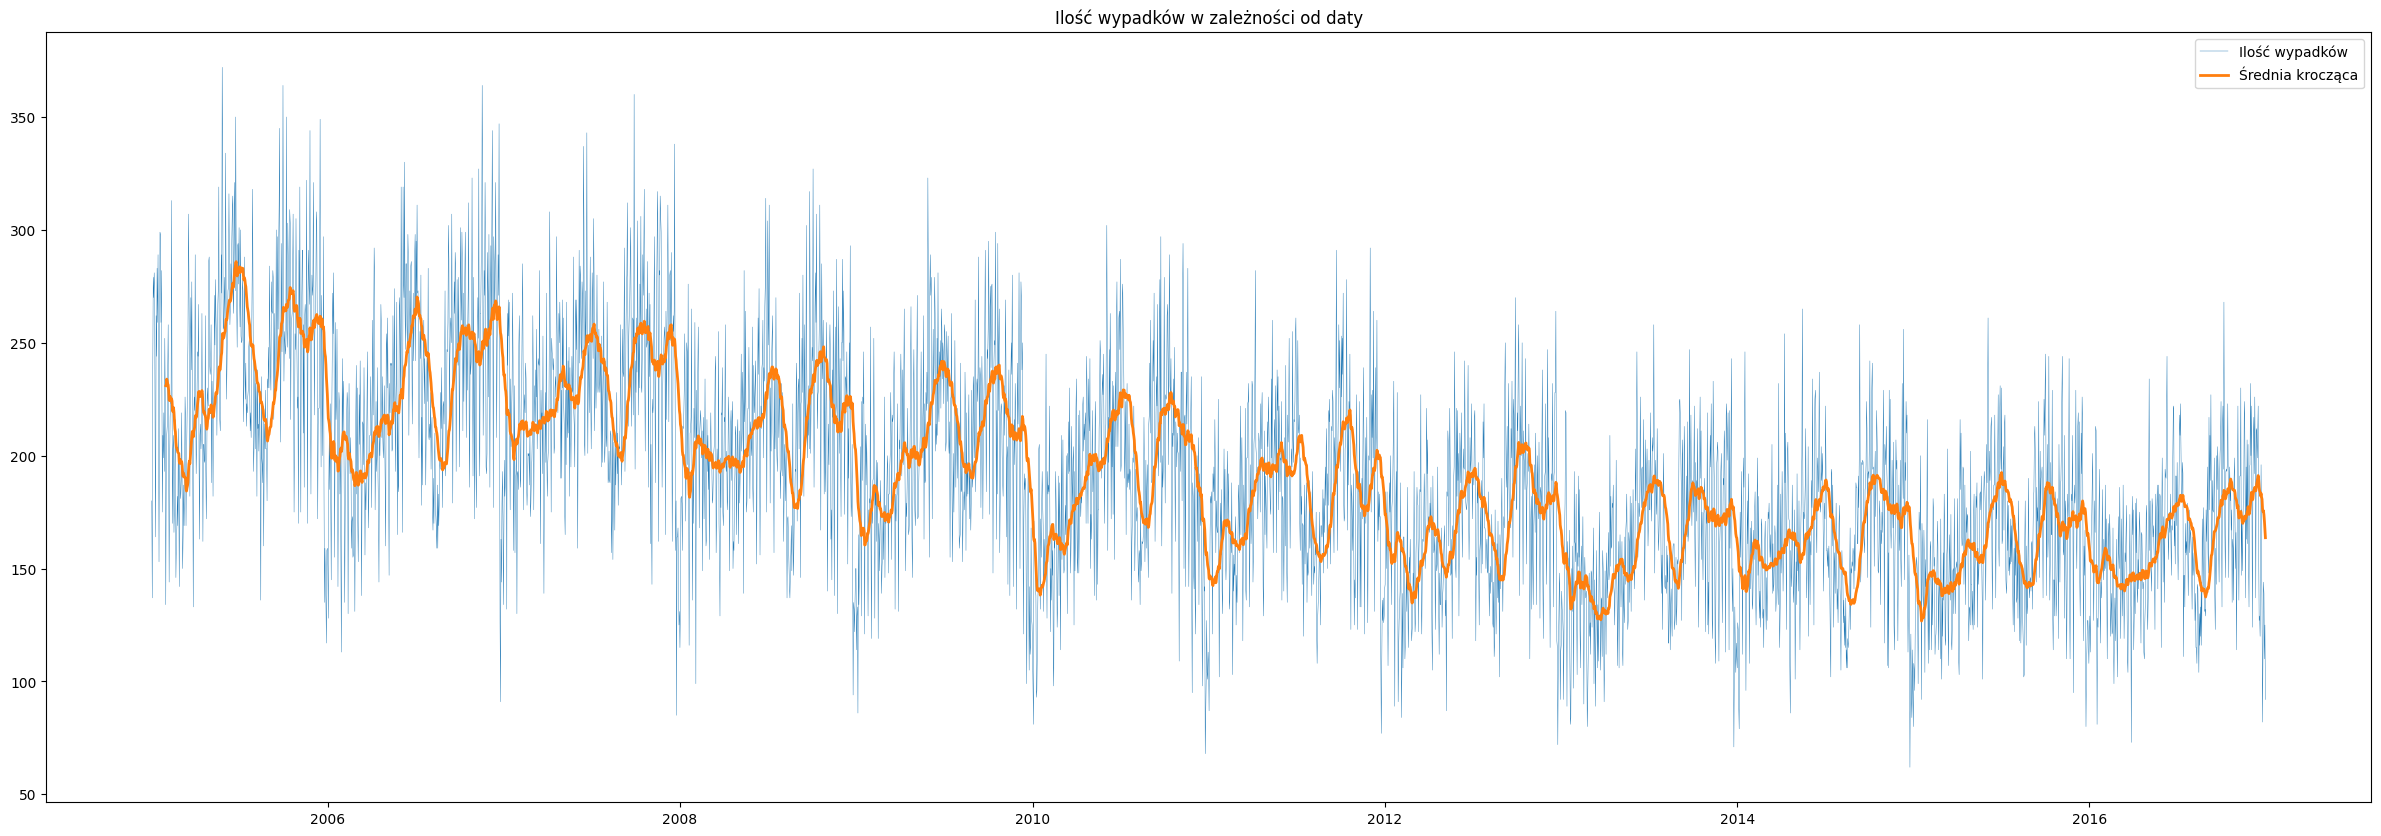

In [22]:
# Wykreślenie liczby wypadków w zależności od daty

plt.figure(figsize=(30,10))
plt.plot(accident.groupby('date')['date'].agg('count'), linewidth=0.3, label='Ilość wypadków')
plt.plot(accident.groupby('date')['date'].agg('count').rolling(window=30).mean(), linewidth=2, label='Średnia krocząca')
plt.title('Ilość wypadków w zależności od daty')
plt.legend()
plt.show()

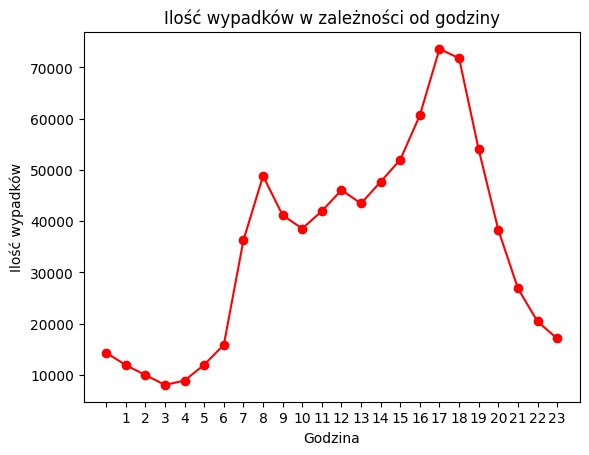

In [23]:
# Liczba wypadków w zależności od godziny
hour = accident['hour'].value_counts().sort_index()
sortedIndex = sorted(hour.index, key=lambda x: (str(x).isdigit(), int(x) if str(x).isdigit() else float('inf')))
hourSorted = hour.loc[sortedIndex]

fig, ax = plt.subplots()
ax.plot(hourSorted.index, hourSorted.values, marker='o',color='red')
ax.set_title('Ilość wypadków w zależności od godziny')
ax.set_xlabel('Godzina')
ax.set_ylabel('Ilość wypadków')
plt.show()

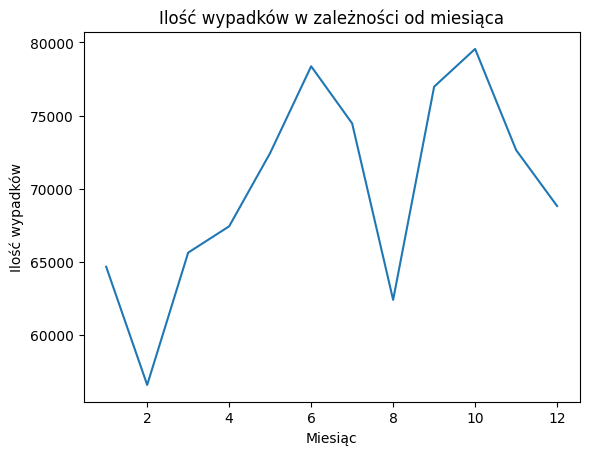

In [24]:
# Liczba wypadków w zależności od miesiąca
month = accident['date'].dt.month.value_counts().sort_index()

fig, ax = plt.subplots()
ax.plot(month.index, month.values)
ax.set_title('Ilość wypadków w zależności od miesiąca')
ax.set_xlabel('Miesiąc')
ax.set_ylabel('Ilość wypadków')
plt.show()


In [25]:
# Przygotowanie danych do wyświetlanie na mapie
accident['long'] = accident['long'].replace('-',0).fillna(0).astype(float).astype(int)
accident['lat'] = accident['lat'].replace('-',0).fillna(0).astype(float).astype(int)

C:\Users\Anton\AppData\Local\Temp\ipykernel_23456\1307640228.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=mapAcc, x="long", y="lat", s=0.75, palette = 'viridis').set(title ='Miejsca wypadków' )


[Text(0.5, 1.0, 'Miejsca wypadków')]

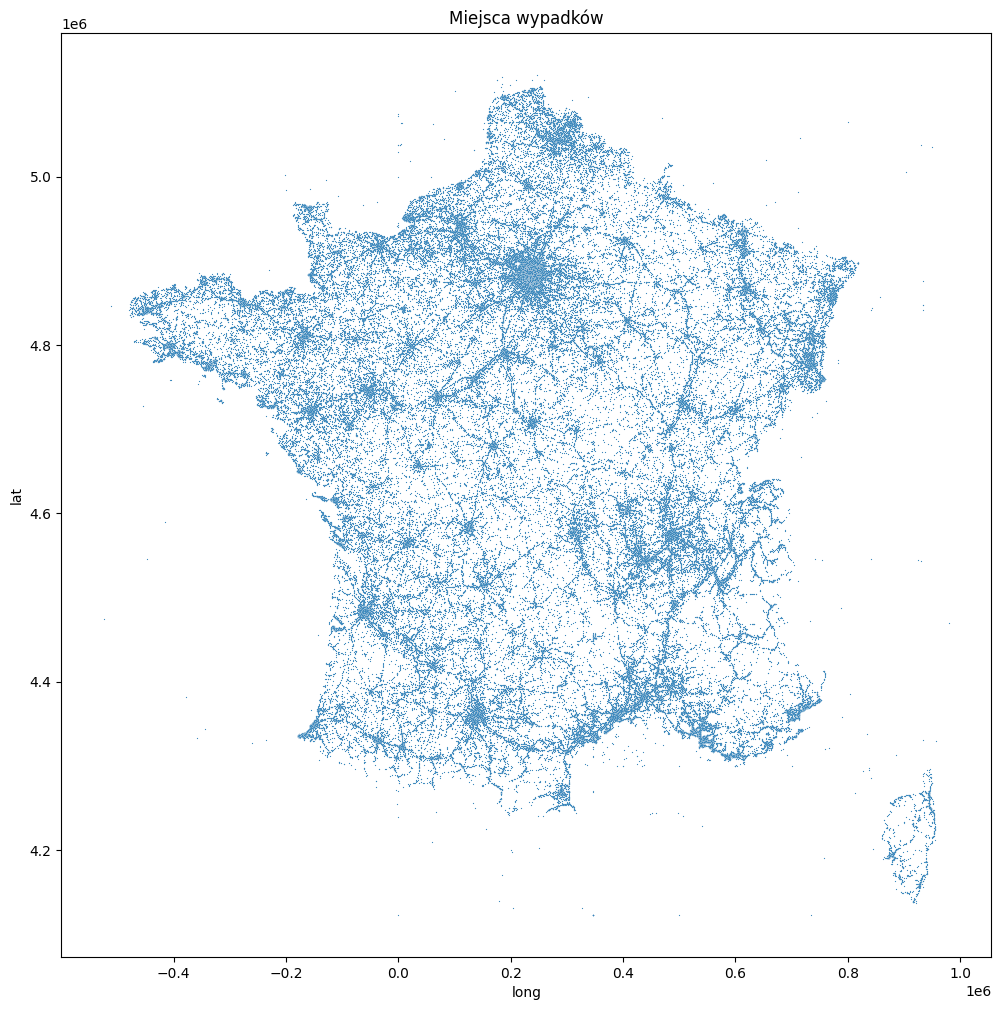

In [26]:
mapAcc = accident.loc[(accident['long'] < 2000000) & (accident['lat'] > 3000000) & (accident['lat'] < 5200000)]
plt.figure(figsize=(12,12)) 
sns.scatterplot(data=mapAcc, x="long", y="lat", s=0.75, palette = 'viridis').set(title ='Miejsca wypadków' )

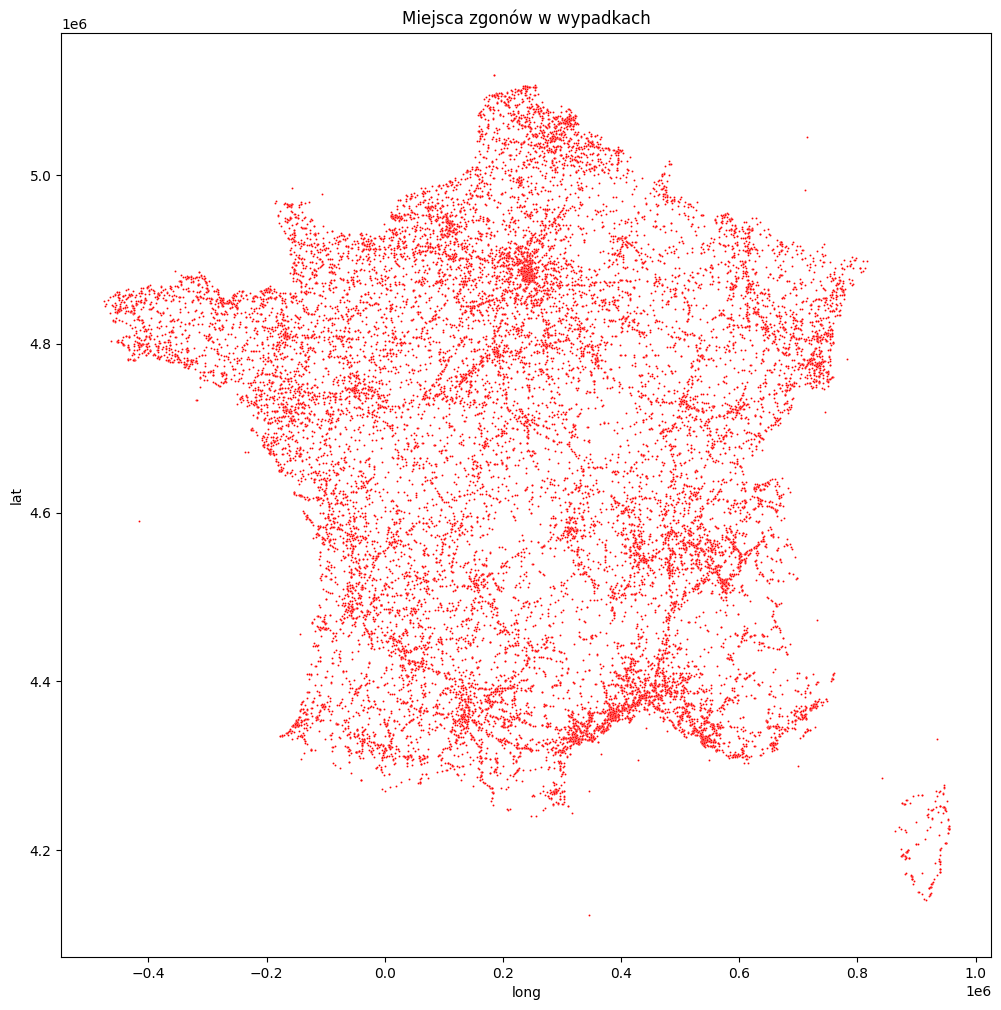

In [27]:
# Zamiana typów danych na numeryczne 
combined['long'] = pd.to_numeric(combined['long'], errors='coerce')
combined['lat'] = pd.to_numeric(combined['lat'], errors='coerce')

# Usunięcie wartości NaN
combined = combined.dropna(subset=['long', 'lat'])

# Filter the DataFrame
mapD = combined.loc[(combined['long'] < 2000000) & (combined['lat'] > 3000000) & (combined['lat'] < 5200000)]

# Create the scatter plot
plt.figure(figsize=(12,12))
sns.scatterplot(data=mapD, x="long", y="lat", s=2, color = 'red').set(title='Miejsca zgonów w wypadkach')
ax.set_facecolor('black')
plt.show()

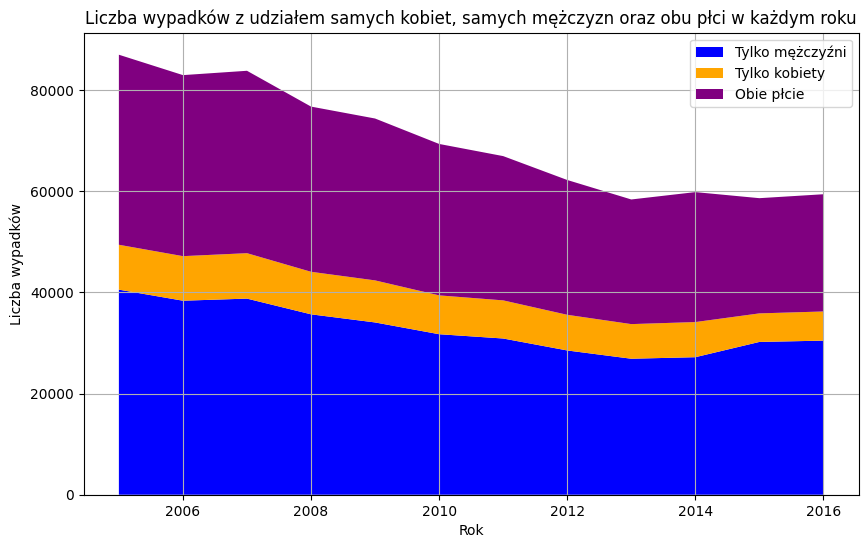

In [28]:
# Wypadki z udziałem mężczyzn w danym roku
MaleAcc = Male.groupby([Male['date'].dt.year]).size()
FemaleAcc = Female.groupby([Female['date'].dt.year]).size()
BothAcc = Both.groupby([Both['date'].dt.year]).size()

plt.figure(figsize=(10, 6))
plt.stackplot(MaleAcc.index, MaleAcc.values, FemaleAcc.values, BothAcc.values,
              labels=['Tylko mężczyźni', 'Tylko kobiety', 'Obie płcie'], colors=['blue', 'orange', 'purple'])
plt.xlabel('Rok')
plt.ylabel('Liczba wypadków')
plt.title('Liczba wypadków z udziałem samych kobiet, samych mężczyzn oraz obu płci w każdym roku')
plt.legend()
plt.grid(True)
plt.show()

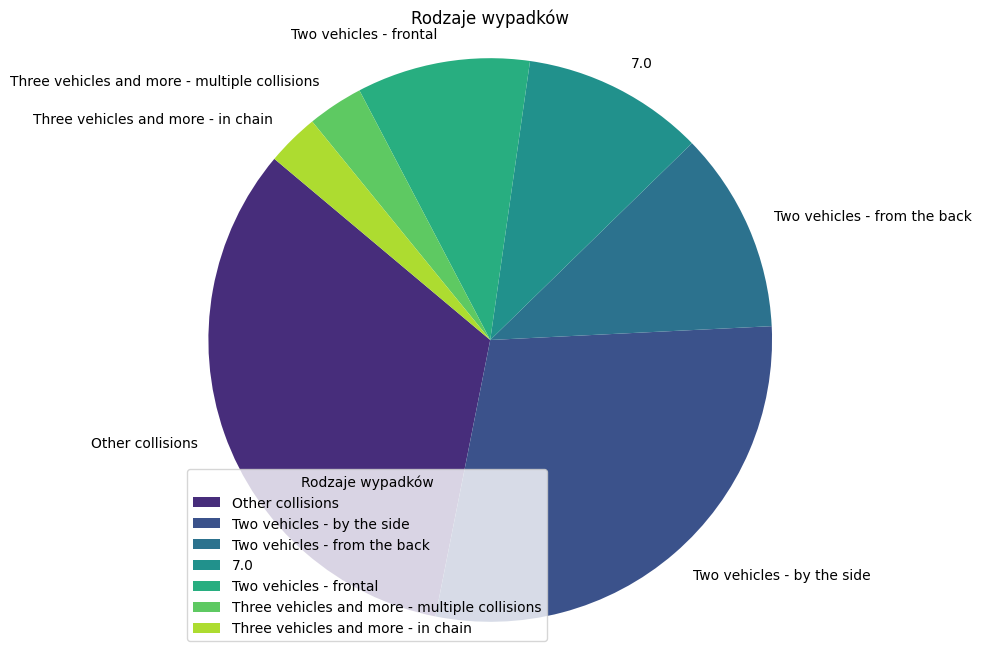

In [29]:
# Wykres kołowy dla rodzaju wypadków
collision_type_counts = accident['collisionTypeText'].value_counts()
colors = sns.color_palette('viridis', len(collision_type_counts))
plt.figure(figsize=(8,8))
plt.pie(collision_type_counts, labels=collision_type_counts.index, startangle=140, colors=colors)
plt.title('Rodzaje wypadków')
plt.axis('equal')  
plt.legend(labels=collision_type_counts.index, loc="best", title="Rodzaje wypadków")
plt.show()


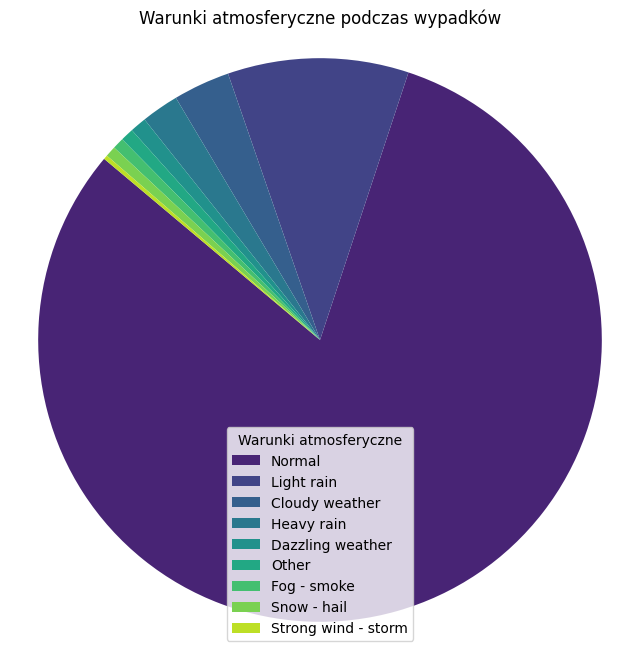

In [30]:
# Wykres kołowy dla warunków atmosferycznych
atmosphere_counts = accident['atmosphereText'].value_counts()
colors = sns.color_palette('viridis', len(atmosphere_counts))
plt.figure(figsize=(8,8))
plt.pie(atmosphere_counts, startangle=140, colors=colors)
plt.title('Warunki atmosferyczne podczas wypadków')
plt.axis('equal') 
plt.legend(labels=atmosphere_counts.index, loc="best", title="Warunki atmosferyczne")
plt.show()

# Tworzenie modelu / modelów

In [31]:
learnModel.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [32]:
learnModel = learnModel.drop(columns=['gps', 'adr', 'lat', 'long','dep','an_nais','num_veh','locp','etatp','catu','place'])
learnModel.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,grav,sexe,trajet,secu,actp
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,1,2,0.0,11.0,0.0
1,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,3,1,9.0,21.0,0.0
2,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,3,1,5.0,11.0,0.0
3,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,3,1,0.0,11.0,0.0
4,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,3,2,0.0,11.0,0.0


In [33]:
learnModel.isnull().sum()

Num_Acc        0
an             0
mois           0
jour           0
hrmn           0
lum            0
agg            0
int            0
atm          116
col           24
com            6
grav           0
sexe           0
trajet       369
secu       43458
actp        1773
dtype: int64

In [34]:
# Zmiana nazw kolumn w pliku accident
learnModel = learnModel.rename(columns={'jour': 'day',
    'mois': 'month',
    'an': 'year',
    'lum': 'lighting',
    'col': 'collision_type',
    'int': 'intersection'})

# Zmiana formatu daty
learnModel['date'] = learnModel['year'].apply(lambda x: date(x))
learnModel['date'] = pd.to_datetime(learnModel['day'].astype(str) + '/' + learnModel['month'].astype(str) + '/' + learnModel['date'] , format='%d/%m/%Y')

# Zmiana formatu godziny
learnModel['hour'] = learnModel['hrmn'].apply(lambda x: str(x)[:-2])

# Usunięcie zbędnych kolumn
learnModel = learnModel.drop(columns=['day','month','year','hrmn'], axis=1)

# Zamiana typów danych na typy numeryczne
learnModel['date'] = pd.to_numeric(learnModel['date'])
learnModel['hour'] = pd.to_numeric(learnModel['hour'])

In [35]:
learnModel = learnModel.drop_duplicates(subset='Num_Acc')
learnModel = learnModel.drop(columns=['Num_Acc'])

# Usunięcie wypadków z kategorii 6 i 7. Dataframe zawiera wypadki samochodowe 
learnModel = learnModel[~learnModel['collision_type'].isin([6.0, 7.0])]

learnModel.head()

,lighting,agg,intersection,atm,collision_type,com,grav,sexe,trajet,secu,actp,date,hour
0,1,2,1,8.0,3.0,5.0,1,2,0.0,11.0,0.0,1454284800000000000,14.0
7,2,2,1,7.0,3.0,477.0,3,1,5.0,23.0,0.0,1471219200000000000,19.0
10,1,2,3,1.0,3.0,11.0,3,2,3.0,21.0,0.0,1482451200000000000,11.0
15,1,2,1,7.0,2.0,51.0,1,1,5.0,21.0,0.0,1462060800000000000,11.0
18,2,1,1,1.0,1.0,250.0,1,2,5.0,11.0,0.0,1463184000000000000,19.0


In [36]:
learnModel = learnModel.dropna()

learnModel.isnull().sum()

lighting          0
agg               0
intersection      0
atm               0
collision_type    0
com               0
grav              0
sexe              0
trajet            0
secu              0
actp              0
date              0
hour              0
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Podział danych na zbiór uczący i testowy
XLearnModel = learnModel.drop(columns=['grav'], axis=1)
YLearnModel = learnModel['grav']   

XLearnModelTest, XLearnModelTrain, YLearnModelTest, YLearnModelTrain = train_test_split(XLearnModel, YLearnModel, test_size=0.3, random_state=42)
XLearnModelTest, XLearnModelValidation, YLearnModelTest, YLearnModelValidation = train_test_split(XLearnModelTest, YLearnModelTest, test_size=0.5, random_state=42)

# Standaryzacja danych
scaler = StandardScaler()

XLearnModelTrain = scaler.fit_transform(XLearnModelTrain)
XLearnModelTest = scaler.transform(XLearnModelTest)
XLearnModelValidation = scaler.transform(XLearnModelValidation)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Stworzenie modelu
LR = LogisticRegression()

# Parametry do przetestowania
paramGrid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'solver': ['liblinear', 'saga']}

# Użycie GridSearchCV do znalezienia najlepszych parametrów
gridSearch = GridSearchCV(LR, paramGrid, cv=5)
gridSearch.fit(XLearnModelTrain, YLearnModelTrain)

# Najlepsze parametry
bestParams = gridSearch.best_params_
print("Best Parameters:",bestParams)

# Najlepszy model
bestLR = gridSearch.best_estimator_

# Walidacja modelu
YLearnModelPredict = bestLR.predict(XLearnModelValidation)
print("Validation Accuracy:",accuracy_score(YLearnModelValidation, YLearnModelPredict))
print("Validation Classification Report:\n",classification_report(YLearnModelValidation, YLearnModelPredict))


# Przewidywanie wartości dla danych testowych
YLearnModelPredict = bestLR.predict(XLearnModelTest)
print("Test Accuracy:",accuracy_score(YLearnModelTest, YLearnModelPredict))
print("Test Classification Report:\n",classification_report(YLearnModelTest, YLearnModelPredict))

Best Parameters: {'C': 10, 'solver': 'saga'}
Validation Accuracy: 0.5369452414382516
Validation Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.96      0.69     79751
           2       0.00      0.00      0.00      3549
           3       0.52      0.10      0.17     29018
           4       0.57      0.16      0.25     51492

    accuracy                           0.54    163810
   macro avg       0.40      0.31      0.28    163810
weighted avg       0.53      0.54      0.44    163810

Test Accuracy: 0.5384958183261095
Test Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.96      0.69     79835
           2       0.00      0.00      0.00      3465
           3       0.51      0.10      0.17     28935
           4       0.58      0.16      0.25     51575

    accuracy                           0.54    163810
   macro avg       0.41      0.31      0.28    163810
we

c:\Moje\Programowanie\Python-interpreter\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Moje\Programowanie\Python-interpreter\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Moje\Programowanie\Python-interpreter\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

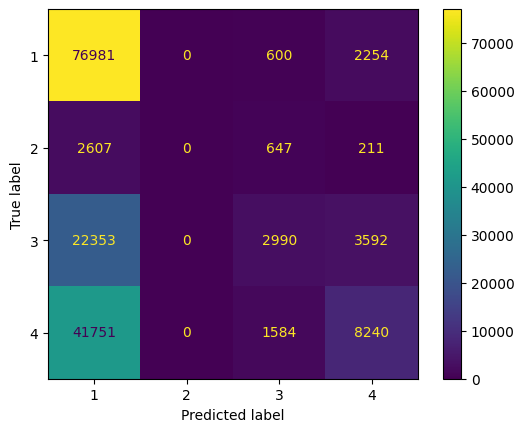

In [39]:
cm = confusion_matrix(YLearnModelTest, YLearnModelPredict)
dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bestLR.classes_)
dis.plot()

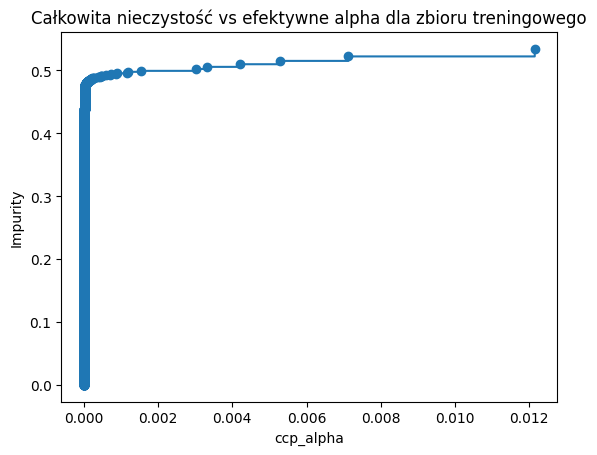

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Stworzenie modelu
DT = DecisionTreeClassifier()

# Trening modelu
beforeCut = DT.cost_complexity_pruning_path(XLearnModelTrain, YLearnModelTrain)
ccpAlpha, impurities = beforeCut.ccp_alphas, beforeCut.impurities

# Wizyalizacja zależności między ccp_alpha a całkowitą nieczystością
plt.figure()
plt.plot(ccpAlpha[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
plt.xlabel('ccp_alpha')
plt.ylabel('Impurity')
plt.title('Całkowita nieczystość vs efektywne alpha dla zbioru treningowego')
plt.show()


In [41]:
from sklearn.metrics import accuracy_score

# Lista klasyfikatorów
clfs = []

# Wybór po 10 ccp_alpha z obu końców listy
ccpAlpha = sorted(ccpAlpha)
smallCCAlpha = ccpAlpha[:10]
largeCCAlpha = ccpAlpha[-10:]
selectedCCAlpha = smallCCAlpha + largeCCAlpha

# Stworzenie klasyfikatorów
for ccp_alpha in selectedCCAlpha:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(XLearnModelTrain, YLearnModelTrain)
    clfs.append(clf)


In [42]:
# Ocena poszczególnych modeli
trainScores = [accuracy_score(YLearnModelTrain, clf.predict(XLearnModelTrain)) for clf in clfs]
valScores = [accuracy_score(YLearnModelValidation, clf.predict(XLearnModelValidation)) for clf in clfs]
testScores = [accuracy_score(YLearnModelTest, clf.predict(XLearnModelTest)) for clf in clfs]
treeSizes = [clf.tree_.node_count for clf in clfs]

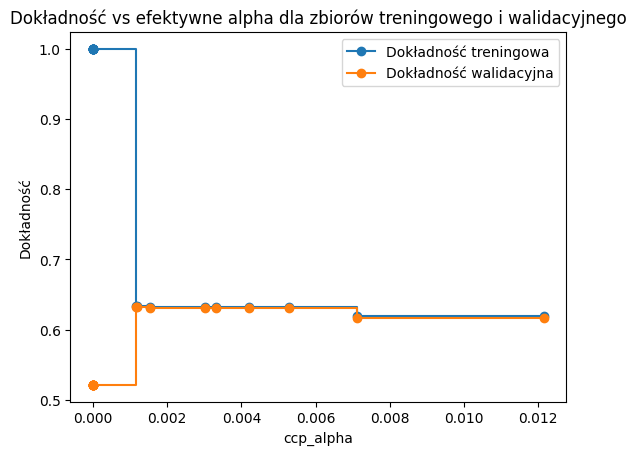

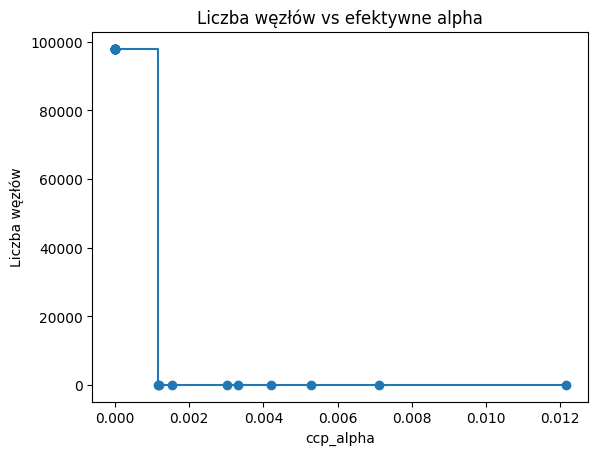

In [43]:
# Wykres zależności między ccp_alpha a dokładnością modelu
plt.figure()
plt.plot(selectedCCAlpha[:-1], trainScores[:-1], marker='o', label='Dokładność treningowa', drawstyle='steps-post')
plt.plot(selectedCCAlpha[:-1], valScores[:-1], marker='o', label='Dokładność walidacyjna', drawstyle='steps-post')
plt.xlabel('ccp_alpha')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Dokładność vs efektywne alpha dla zbiorów treningowego i walidacyjnego')
plt.show()

plt.figure()
plt.plot(selectedCCAlpha[:-1], treeSizes[:-1], marker='o', drawstyle='steps-post')
plt.xlabel('ccp_alpha')
plt.ylabel('Liczba węzłów')
plt.title('Liczba węzłów vs efektywne alpha')
plt.show()


In [44]:
# Wybór najlepszego modelu na podstawie zbioru walidacyjnego
best_alpha = selectedCCAlpha[valScores.index(max(valScores))]

# Trenowanie modelu przed i po przycinaniu
# Model bez przycinania
clf_no_prune = DecisionTreeClassifier(random_state=42)
clf_no_prune.fit(XLearnModelTrain, YLearnModelTrain)

# Model z przycinaniem
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_pruned.fit(XLearnModelTrain, YLearnModelTrain)

# Ocena modeli
# Ocena modelu bez przycinania
no_prune_train_score = accuracy_score(YLearnModelTrain, clf_no_prune.predict(XLearnModelTrain))
no_prune_test_score = accuracy_score(YLearnModelTest, clf_no_prune.predict(XLearnModelTest))
no_prune_size = clf_no_prune.tree_.node_count
no_prune_depth = clf_no_prune.get_depth()
no_prune_leaves = clf_no_prune.get_n_leaves()

# Ocena modelu z przycinaniem
pruned_train_score = accuracy_score(YLearnModelTrain, clf_pruned.predict(XLearnModelTrain))
pruned_test_score = accuracy_score(YLearnModelTest, clf_pruned.predict(XLearnModelTest))
pruned_size = clf_pruned.tree_.node_count
pruned_depth = clf_pruned.get_depth()
pruned_leaves = clf_pruned.get_n_leaves()

In [45]:
print(f'Model bez przycinania - Dokładność treningowa: {no_prune_train_score}, Dokładność testowa: {no_prune_test_score}, Liczba węzłów: {no_prune_size}, Głębokość drzewa: {no_prune_depth}, Liczba liści: {no_prune_leaves}')
print(f'Model z przycinaniem - Dokładność treningowa: {pruned_train_score}, Dokładność testowa: {pruned_test_score}, Liczba węzłów: {pruned_size}, Głębokość drzewa: {pruned_depth}, Liczba liści: {pruned_leaves}')

Model bez przycinania - Dokładność treningowa: 0.9999928779494192, Dokładność testowa: 0.5229351077467798, Liczba węzłów: 97917, Głębokość drzewa: 50, Liczba liści: 48959
Model z przycinaniem - Dokładność treningowa: 0.6329651233183058, Dokładność testowa: 0.6315243269641658, Liczba węzłów: 21, Głębokość drzewa: 5, Liczba liści: 11
